# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,474418,25.4,1044524,55.8,621911,33.3
Vcells,875274,6.7,8388608,64.0,1601572,12.3


Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'rpart' was built under R version 3.6.3"

ERROR: Error in setwd("D:\\gdrive\\Austral2022R\\"): cannot change working directory


In [2]:
options(repr.plot.width=20, repr.plot.height=10) 
setwd("C:\\Users\\oliva\\OneDrive\\Desktop\\DS\\Austral\\08 - Labo1") #Aqui se debe poner la ruta de la PC local

In [6]:
dtrain <- fread("./labo/datasets/paquete_premium_202011.csv")   #cargo el dataset

In [7]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Cargo el dataset a donde voy a aplicar el modelo

In [11]:
dapply <- fread("./labo/datasets/paquete_premium_202101.csv")   #cargo el dataset

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [12]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [13]:
head(prediccion)

BAJA+1,BAJA+2,CONTINUA
0.0007027639,0.001083083,0.9982142
0.0007027639,0.001083083,0.9982142
0.0007027639,0.001083083,0.9982142
0.0007027639,0.001083083,0.9982142
0.0007027639,0.001083083,0.9982142
0.0007027639,0.001083083,0.9982142


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [14]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [15]:
head( prob_baja2)

1           2           3           4           5           6 
0.001083083 0.001083083 0.001083083 0.001083083 0.001083083 0.001083083

prob_baja2 es el vector de probabilidades

In [16]:
length( prob_baja2 )
nrow( dapply )

[1] 160607

[1] 160607

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [17]:
Predicted   <- ifelse( prob_baja2 > 1/60, 1, 0 )

In [18]:
head( Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

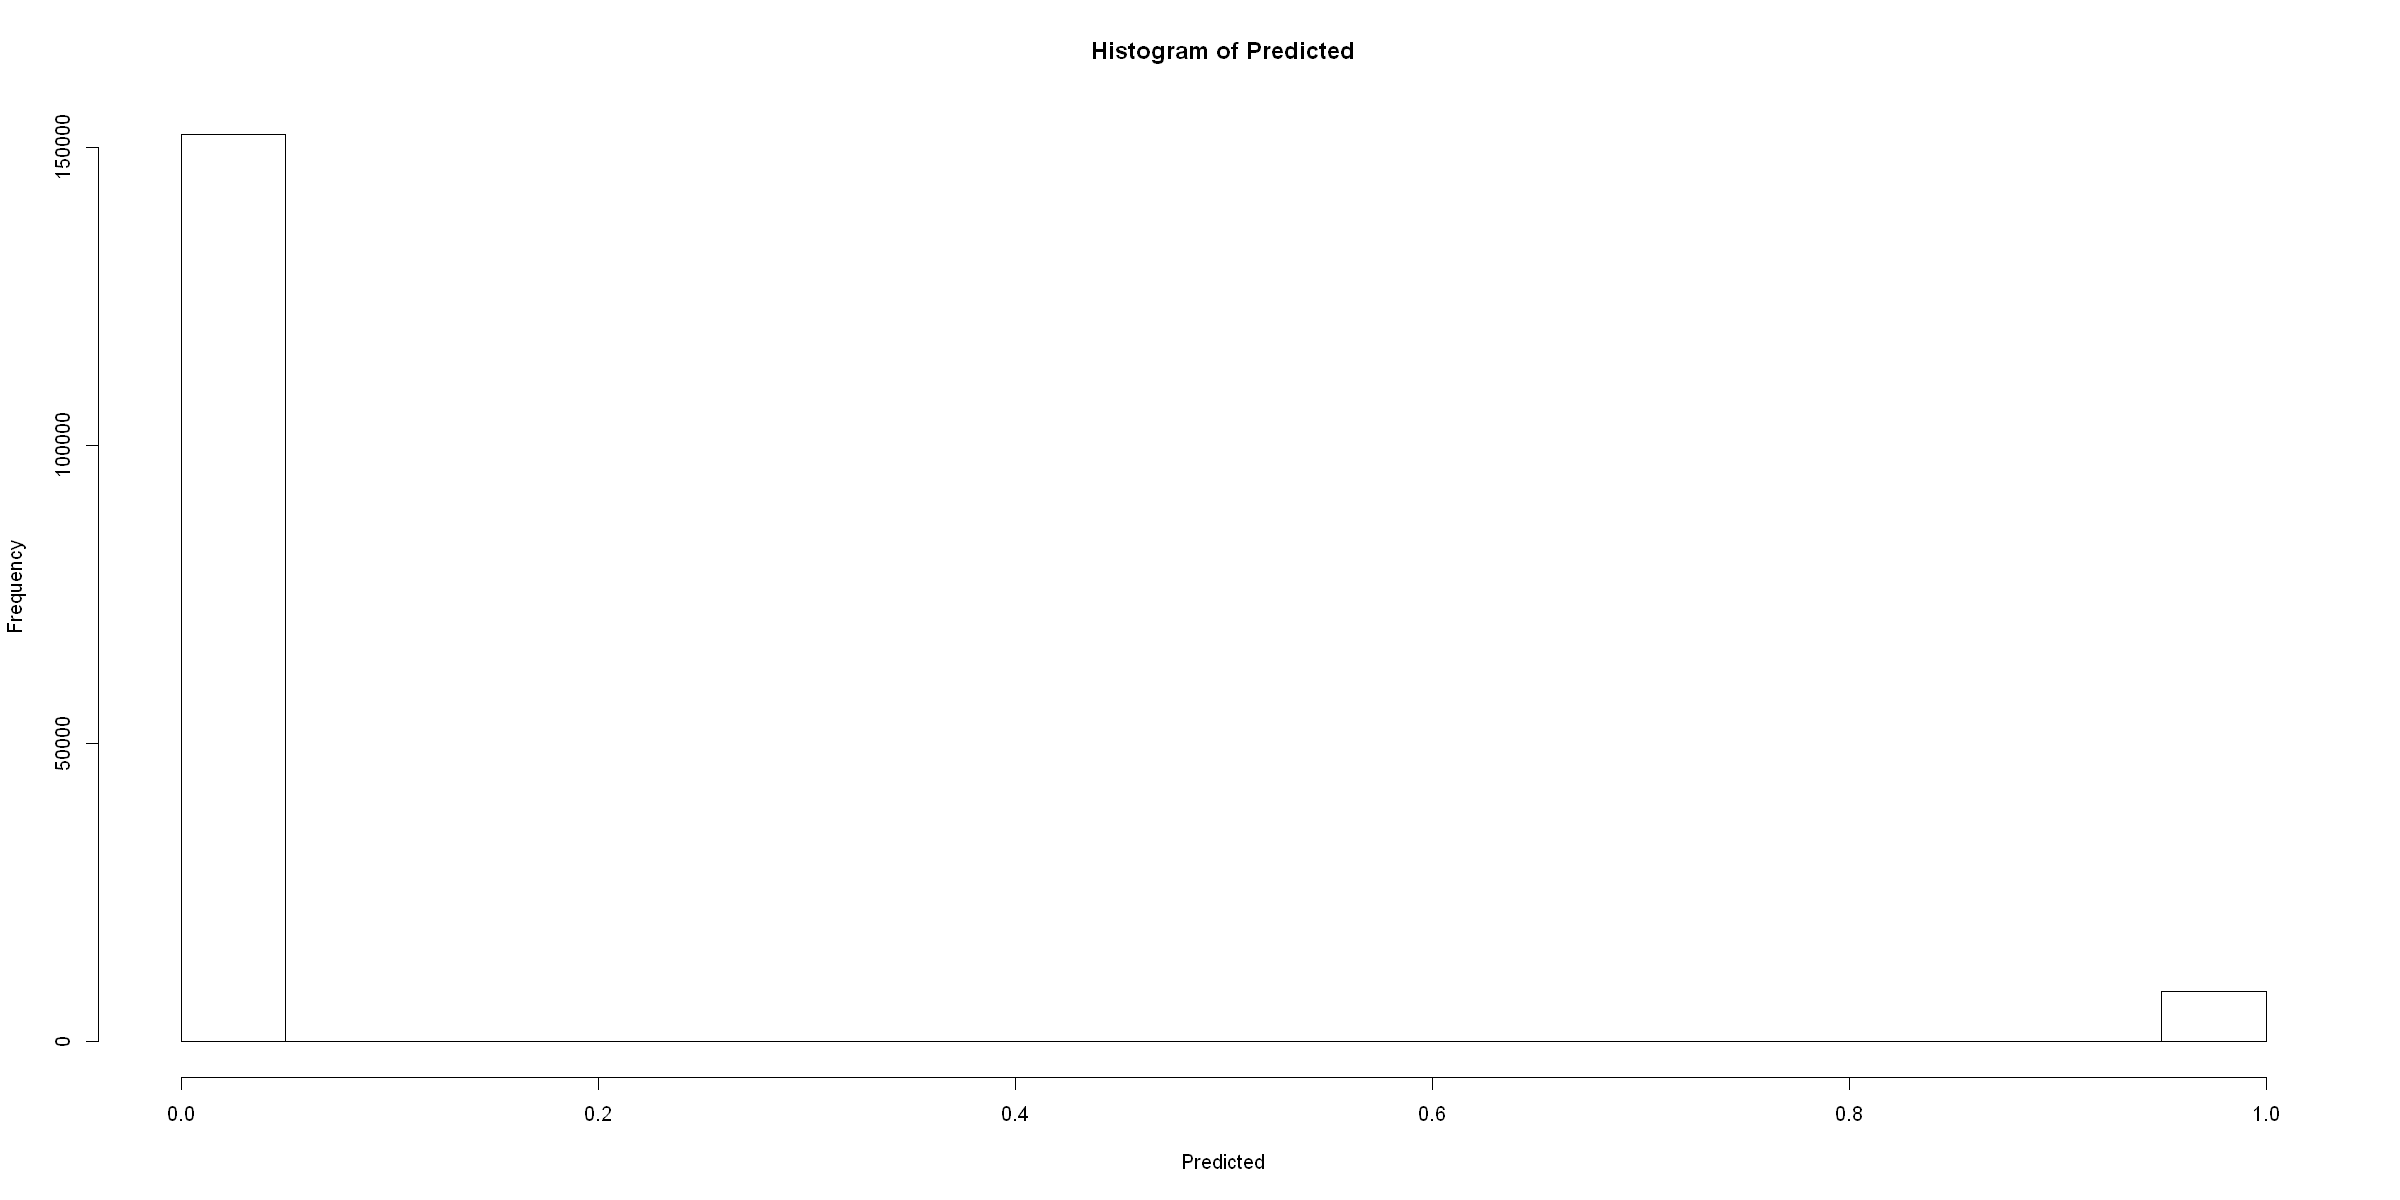

In [19]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [20]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [21]:
head( entrega)

numero_de_cliente,Predicted
4572300,0
4572957,0
4572973,0
4572998,0
4573029,0
4573199,0


In [32]:
entrega[ , .N, Predicted] #todas las filas, por columnas, group by prediccion

Predicted,N
0,152235
1,8372


Esto significa que se enviaran 8157 estímulos

In [24]:
#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./labo/exp/",  showWarnings = FALSE ) 
dir.create( "./labo/exp/ZH2017/", showWarnings = FALSE )

fwrite( entrega, 
        file= "./labo/exp/ZH2017/para_Kaggle_0107.csv",
        sep=  "," )

Subiendo a Kaggle la prediccion anterior se obtiene en el Public Leaderboard 13.87474